# SVM简介
**支持向量机（support vector machines, SVM）** 是一种**二分类**模型。

它的基本模型是定义在特征空间上的间隔最大的**线性分类器**，间隔最大使它有别于感知机；<br>
SVM还包括**核技巧**，这使它成为实质上的**非线性分类器**。<br>
SVM的的学习策略就是**间隔最大化**，可形式化为一个求解**凸二次规划**的问题，也等价于**正则化的合页损失函数**的最小化问题。<br>
SVM的的学习算法就是求解凸二次规划的**最优化算法**。

原始数据类型和形状：
X类型: <class 'numpy.ndarray'>, 形状: (150, 4)
y类型: <class 'numpy.ndarray'>, 形状: (150,)

筛选后的数据类型和形状：
X类型: <class 'numpy.ndarray'>, 形状: (100, 2)
y类型: <class 'numpy.ndarray'>, 形状: (100,)


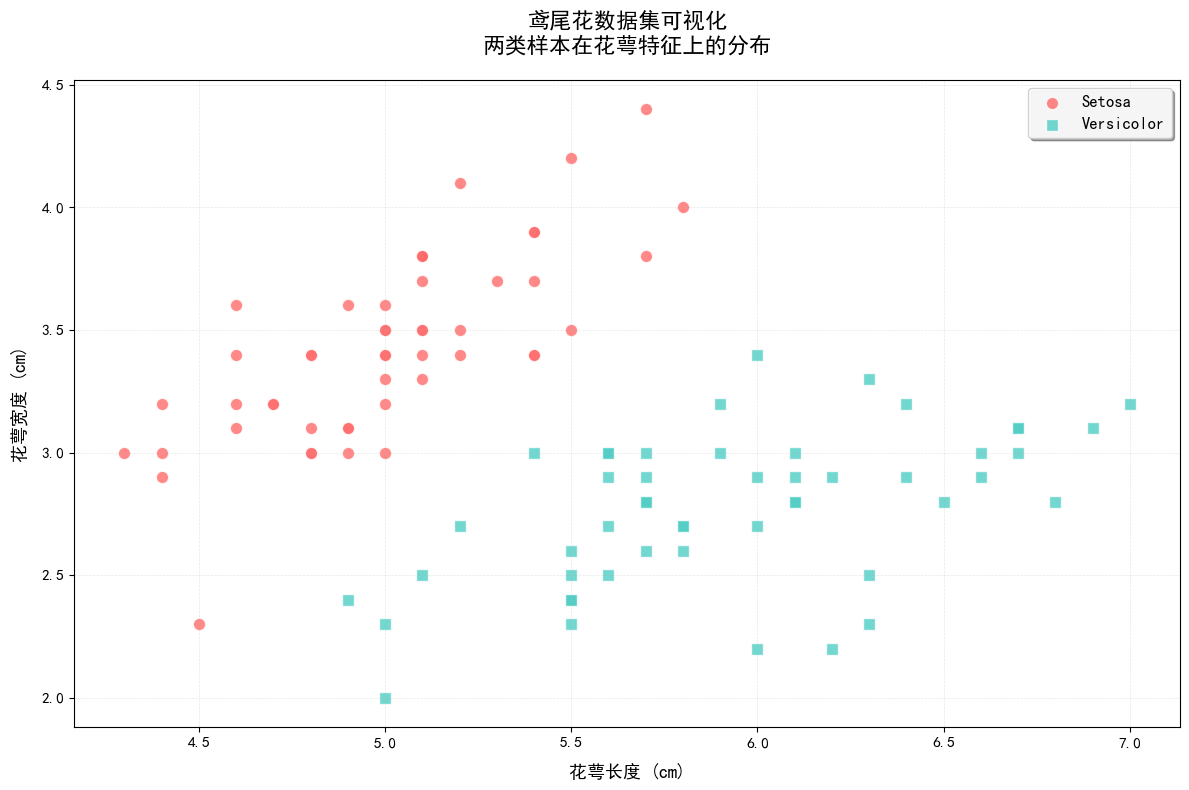


数据统计信息：
Setosa样本数: 50
Versicolor样本数: 50
总样本数: 100
花萼长度范围: 4.30 - 7.00 cm
花萼宽度范围: 2.00 - 4.40 cm


In [5]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体和图形样式
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data  # 特征数据：花萼长度、花萼宽度、花瓣长度、花瓣宽度
y = iris.target # 目标标签：0=Setosa, 1=Versicolor, 2=Virginica

print("原始数据类型和形状：")
print(f"X类型: {type(X)}, 形状: {X.shape}")  # 150个样本，4个特征
print(f"y类型: {type(y)}, 形状: {y.shape}")  # 150个标签

# 数据筛选：只选取前两类（Setosa和Versicolor）和前两个特征（花萼长度和宽度）
X = X[y<2, :2]  # 筛选出标签为0和1的样本，只取前两个特征
y = y[y<2]      # 对应的标签

print("\n筛选后的数据类型和形状：")
print(f"X类型: {type(X)}, 形状: {X.shape}")  # 100个样本，2个特征
print(f"y类型: {type(y)}, 形状: {y.shape}")  # 100个标签

# 创建图形
plt.figure(figsize=(12, 8))

# 绘制类别0（Setosa）的散点 - 红色圆形
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], 
           c='#FF6B6B',           # 柔和的红色
           marker='o',            # 圆形标记
           label='Setosa',        # 图例标签
           alpha=0.8,             # 透明度
           s=80,                  # 点的大小
           edgecolors='white',    # 白色边框
           linewidth=1)           # 边框宽度

# 绘制类别1（Versicolor）的散点 - 蓝色方形
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], 
           c='#4ECDC4',           # 柔和的蓝绿色
           marker='s',            # 方形标记
           label='Versicolor',    # 图例标签
           alpha=0.8,             # 透明度
           s=80,                  # 点的大小
           edgecolors='white',    # 白色边框
           linewidth=1)           # 边框宽度

# 设置图表标题和坐标轴标签
plt.title('鸢尾花数据集可视化\n两类样本在花萼特征上的分布', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('花萼长度 (cm)', fontsize=13, labelpad=10)
plt.ylabel('花萼宽度 (cm)', fontsize=13, labelpad=10)

# 美化网格
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# 美化图例
plt.legend(fontsize=12, 
           frameon=True,          # 显示图例边框
           fancybox=True,         # 圆角边框
           shadow=True,           # 阴影效果
           loc='upper right',     # 图例位置
           framealpha=0.9)        # 图例背景透明度

# 设置坐标轴刻度字体大小
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# 调整布局并显示
plt.tight_layout()
plt.show()

# 数据统计信息
print(f"\n数据统计信息：")
print(f"Setosa样本数: {len(X[y==0])}")
print(f"Versicolor样本数: {len(X[y==1])}")
print(f"总样本数: {len(X)}")
print(f"花萼长度范围: {X[:, 0].min():.2f} - {X[:, 0].max():.2f} cm")
print(f"花萼宽度范围: {X[:, 1].min():.2f} - {X[:, 1].max():.2f} cm")